# Public Transport Passenger Forecasting - ARIMA Time Series Model

## Project Workflow :
### 1. Loading the necessary libraries and modules for forecasting.
### 2. Uploading the dataset and combining all the columns of the dataset into one common column.
### 3. Loading the dataset into the DataFrame and Changing the Date Column to Datetime format.
### 4. Filling the Missing Numeric Values and Assigning to track the Forcast horizon for 7 days
### 5. Running AutoRegressiveIntegratedMovingAverage(ARIMA) for Each Column and including plots
### 6. Plotting the forecast graph
### 7. Training and Testing the data
### 8. Fitting ARIMA to the model and Predicting the test period
### 9. Plotting the Train, Test, Predicted Model Graph
### 10. Predicting the forecast for next 7 days
### 11. Plotting the future 7 day forecast
### 12. Saving the Forecast
### 13. Saving Combined forecast

### 1. Loading the necessary libraries and modules for forecasting.

In [2]:
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np

### 2. Uploading the dataset and combining all the columns of the dataset into one common column.

In [3]:
FILE = r"C:\Users\HD\Desktop\Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv"
Service_Cols = ["Local Route","Light Rail","Peak Service","Rapid Route","School","Other"]
Out_Dir = "Daily Public Transport"
os.makedirs(Out_Dir, exist_ok = True)

### 3. Loading the dataset into the DataFrame and Changing the Date Column to Datetime format.

In [4]:
df = pd.read_csv(FILE)
df["Date"] = pd.to_datetime(df["Date"], errors = "coerce")
df= df.set_index("Date").sort_index()
df.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-01,15987,9962,407,21223,3715,NaN
2019-07-02,16895,10656,409,21715,3993,NaN
2019-07-03,16613,10658,427,22025,3638,NaN
2019-07-04,16604,10445,437,21868,3576,NaN
2019-07-05,16040,10532,400,20697,2856,NaN


### 4. Filling the Missing Numeric Values and Assigning to track the Forcast horizon for 7 days

In [5]:
df[Service_Cols] = df[Service_Cols].ffill().bfill()
if "Other" in df.columns:
    df["Other"] = df["Other"].fillna(0)
df["Total"] = df[Service_Cols].sum(axis=1)
df.isnull().sum()
H = 7
Test_Days = 7

### 5. Running AutoRegressiveIntegratedMovingAverage(ARIMA) for Each Column and including plots


-- Forecasting Local Route --


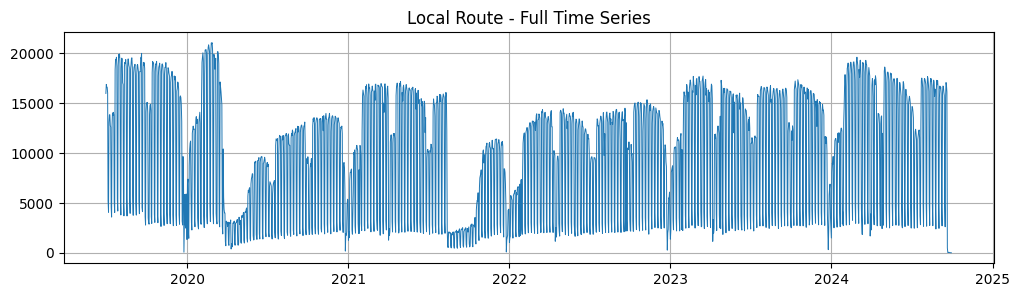


-- Forecasting Light Rail --


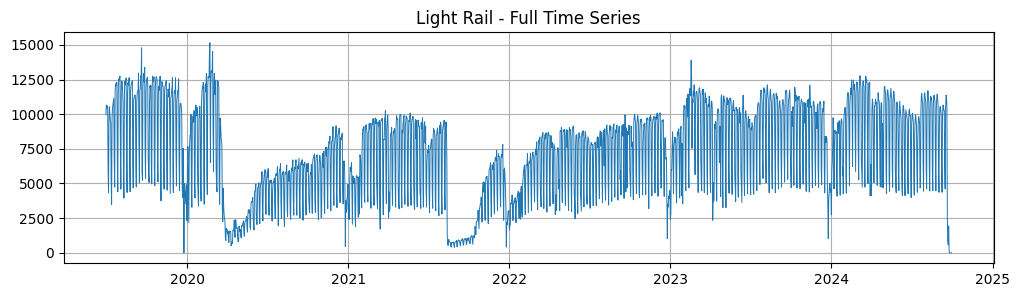


-- Forecasting Peak Service --


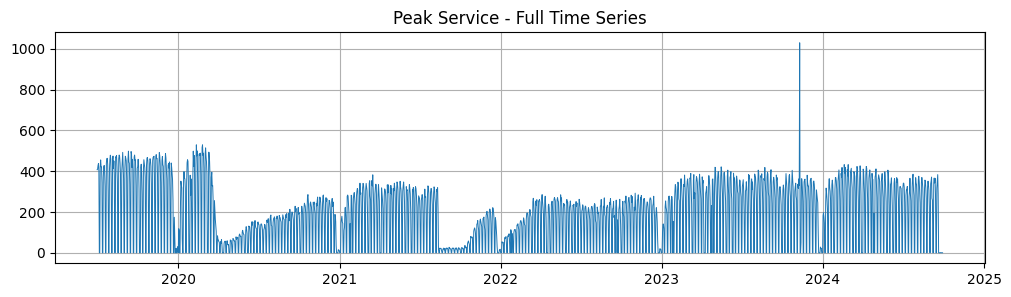


-- Forecasting Rapid Route --


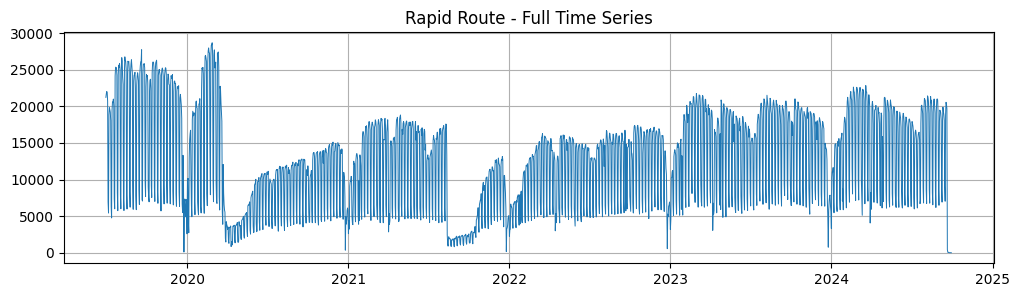


-- Forecasting School --


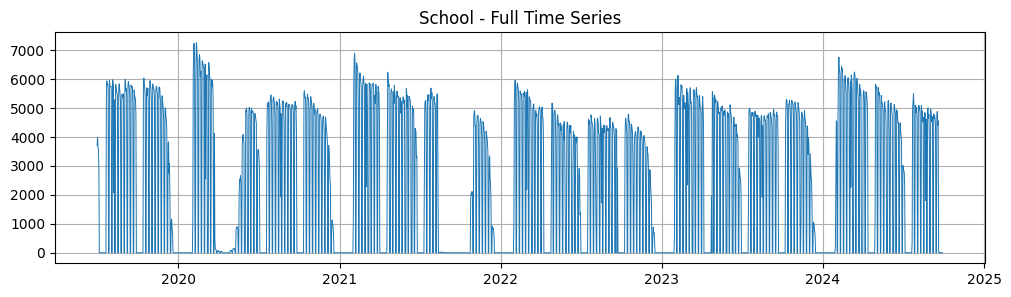


-- Forecasting Other --


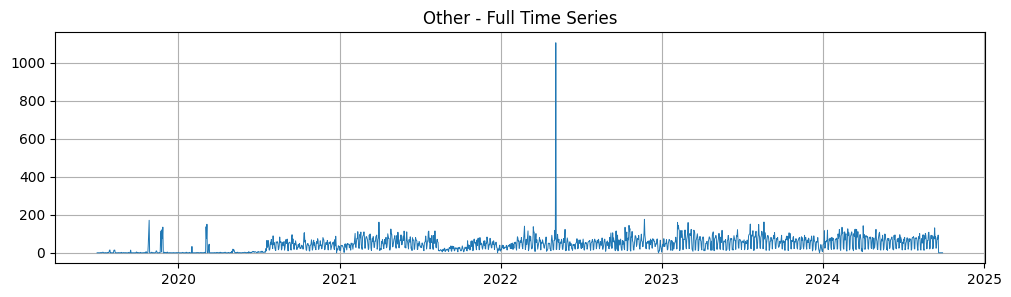

In [6]:
all_forecasts = {}
for col in Service_Cols:
    print(f"\n-- Forecasting {col} --")
    series = df[col].astype(float).dropna()
    plt.figure(figsize=(12,3))
    plt.plot(series, linewidth = 0.7)
    plt.title(f"{col} - Full Time Series")
    plt.grid(True)
    plt.show()

### If its too short for ARIMA then we implement this fallback code

In [14]:
if len(series) < 20:
    print("Series too short - using naive forecast")
    last = series.iloc[-1]
    forecast = pd.series([last]*H, index = pd.date_range(start=series.index[-1]+pd.Timedelta(days=1),periods=H, freq='D'))
    plt.figure(figsize=(10,3))
    plt.plot(series[-60:], label="Last 60 days")
    plt.plot(forecast.index, forecast.values, marker="o",label="7-day forecast")
    plt.title(f"{col} - 7-Day Forecast")
    plt.legend()
    plt.grid(True)
    print(f"Generating forecast plot for: {col}")
    plt.show()
    all_forecasts[col] = forecast
    forecast.to_csv(f"{Out_Dir}/{col.replace('','_')}_7day_arima.csv", header = [col])

### 6. Plotting the forecast graph

NameError: name 'forecast' is not defined

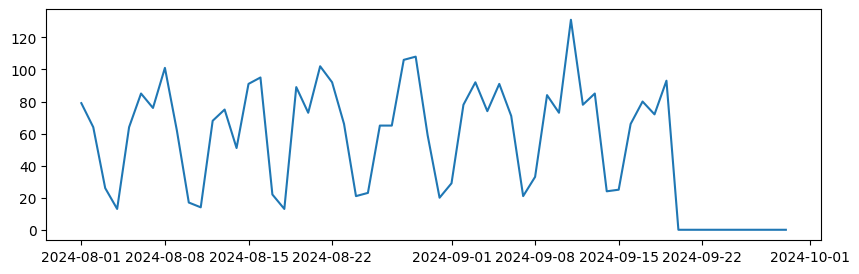

In [15]:
    plt.figure(figsize=(10,3))
    plt.plot(series[-60:], label="Last 60 days")
    plt.plot(forecast.index, forecast.values, marker="o",label="7-day forecast")
    plt.title(f"{col} - 7-Day Forecast")
    plt.legend()
    plt.grid(True)
    print(f"Generating forecast plot for: {col}")
    plt.show()
    all_forecasts[col] = forecast
    forecast.to_csv(f"{Out_Dir}/{col.replace('','_')}_7day_arima.csv", header = [col])

### 7. Training and Testing the data

In [16]:
train = series.iloc[:-Test_Days]
test = series.iloc[-Test_Days:]

### 8. Fitting ARIMA to the model and Predicting the test period

In [17]:
model = ARIMA(train,order=(2,1,2))
fit = model.fit()
pred_test = fit.forecast(steps=len(test))
pred_test.index = test.index

### 9. Plotting the Train, Test, Predicted Model Graph

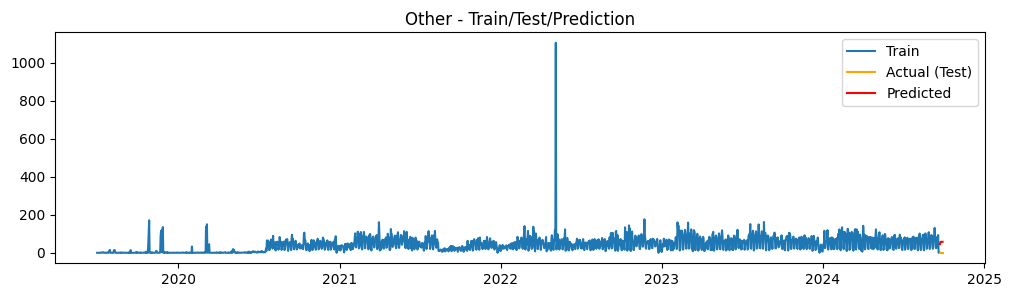

In [18]:
plt.figure(figsize=(12,3))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label = "Actual (Test)", color = "orange")
plt.plot(pred_test.index, pred_test, label = "Predicted", color="red")
plt.title(f"{col} - Train/Test/Prediction")
plt.legend()
plt.show()

### 10. Predicting the forecast for next 7 days

In [19]:
future = fit.forecast(steps=H)
future.index = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1), periods= H, freq= "D")

### 11. Plotting the future 7 day forecast

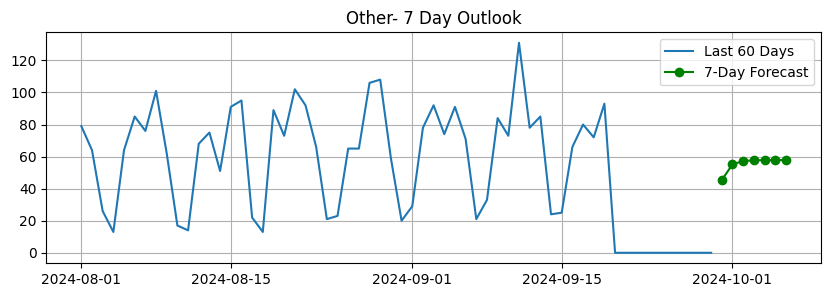

In [20]:
plt.figure(figsize=(10,3))
plt.plot(series[-60:],label="Last 60 Days")
plt.plot(future.index,future.values,marker="o",label="7-Day Forecast", color="green")
plt.title(f"{col}- 7 Day Outlook")
plt.legend()
plt.grid(True)
plt.show()

### 12. Saving the Forecast

In [21]:
all_forecasts[col] = future
future.to_csv(f"{Out_Dir}/{col.replace(' ','_')}_7day_arima.csv",header=[col])

### 13. Saving Combined forecast

In [22]:
combined = pd.DataFrame(all_forecasts)
combined.index_name = "date"
combined.to_csv(f"{Out_Dir}/all_services_7day_arima.csv")
print("All Forecasts saved in: ",Out_Dir)
print(combined.head(H))

All Forecasts saved in:  Daily Public Transport
                Other
2024-09-30  45.393557
2024-10-01  55.175480
2024-10-02  57.234797
2024-10-03  57.704920
2024-10-04  57.784049
2024-10-05  57.817404
2024-10-06  57.812152


SyntaxError: invalid syntax (2830201818.py, line 1)